# Object detection
## R-CNNs
This is known as region CNNS. It operates in 3 stages, 
1. First stage scans the image and identifies up to 2000 bounding boxes representing region of interests that may contain objects
2. The second stage is a deep CNN that extracts featurs fro regions of interest. 
3. The third is a support vector machine(SVM) that classifies the features.
An algorithm called non-maximum supressions(NMS) filters the output and selects the best bounding box for each object.  NMS is crutial for all mordern object detection systems.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

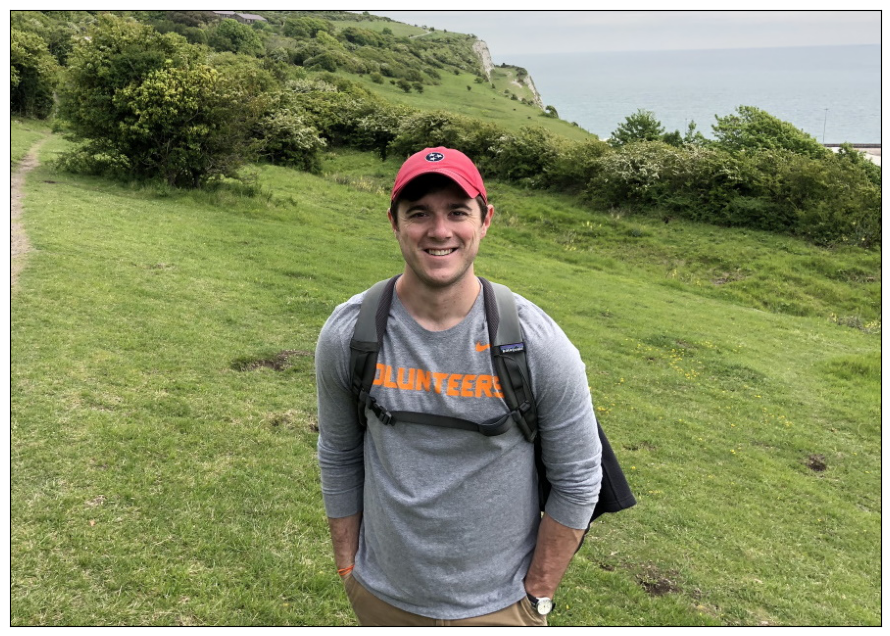

In [2]:
image = Image.open('Data/mask-rcnn/adam.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

In [4]:
from mask import *
import onnxruntime as rt

image_data = preprocess(image)
session = rt.InferenceSession('Data/mask-rcnn//MaskRCNN-12-int8.onnx')
input_name = session.get_inputs()[0].name
result = session.run(None, { input_name: image_data})

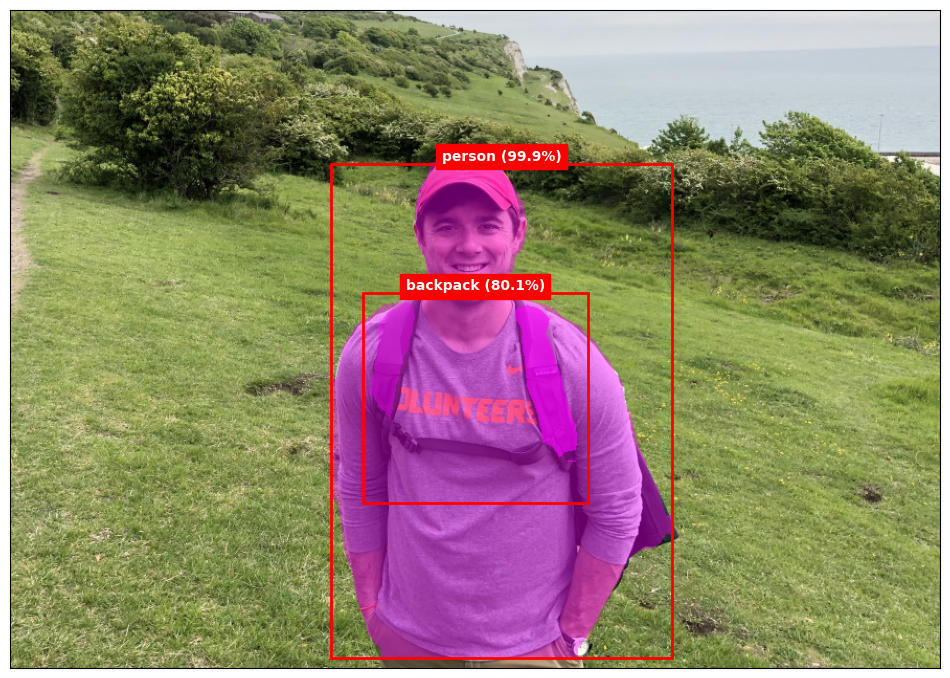

In [6]:
# visualize results
boxes = result[0] # Bounding boxes
labels = result[1] # Class labels
scores = result[2] # Confidence scores
masks = result[3] # Segmentation masks

annotate_image(image, boxes, labels, scores, masks)

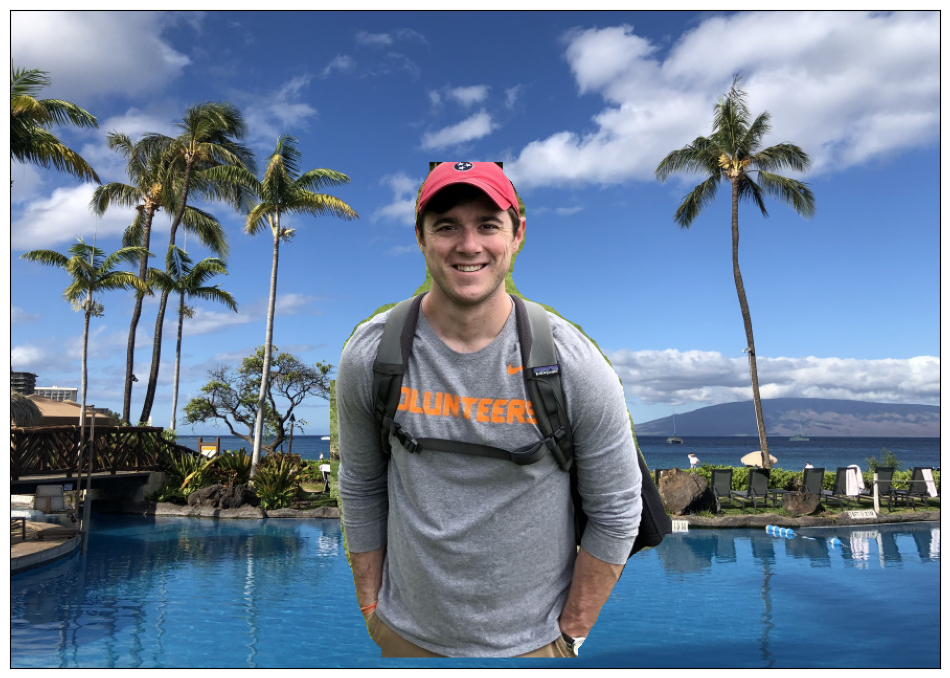

In [10]:
fg_image = Image.open('Data/mask-rcnn/adam.jpg')
bg_image = Image.open('Data/mask-rcnn/maui.jpg')
change_background(session, fg_image, bg_image)